In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd

np.random.seed(42)

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist.target_names)
print(mnist.feature_names)

['class']
['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
print(X.shape)
X

(70000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
print(y.shape)
y

(70000,)


array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y = y.astype(np.uint8)

In [9]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

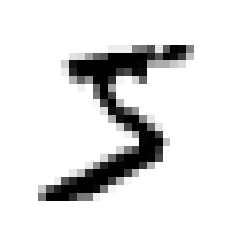

In [10]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

In [11]:
y[0]

5

In [12]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()

In [19]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [22]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [26]:
threshold=0

In [27]:
y_some_digit_pred =  (y_scores>threshold)
y_some_digit_pred

array([ True])

In [28]:
y_scores = sgd_clf.decision_function(X_train)

In [29]:
threshold=0
y_predictions_0 = (y_scores>threshold)
unique, counts = np.unique(y_predictions_0, return_counts=True)
print(np.asarray((unique, counts)).T)
print("Precision: ", precision_score(y_train_5, y_predictions_0))
print("Recall: ", recall_score(y_train_5, y_predictions_0))
print("F1: ", f1_score(y_train_5, y_predictions_0))

[[    0 52917]
 [    1  7083]]
Precision:  0.6805026118876183
Recall:  0.8891348459693783
F1:  0.7709532949456175


In [30]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [31]:
f1_best = np.where(precisions == recalls)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

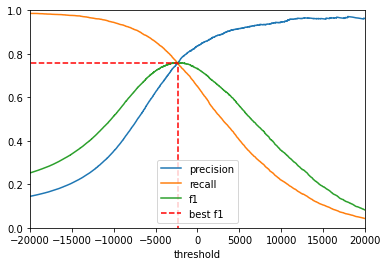

In [32]:
plt.plot(thresholds, precisions[:-1], label="precision")
plt.plot(thresholds, recalls[:-1], label="recall")
plt.plot(thresholds, f1_scores[:-1], label="f1")
plt.plot(np.r_[-10**10,np.repeat(thresholds[f1_best],2)], np.r_[np.repeat(precisions[f1_best],2), 0],
               "r--", label="best f1")
plt.axis([-20000,20000,0,1])
plt.xlabel("threshold")
plt.legend()

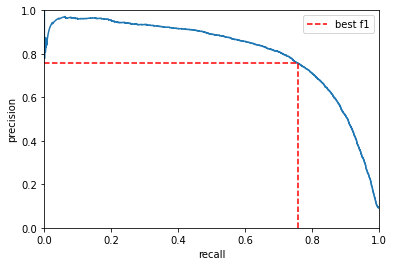

In [33]:
plt.plot(recalls, precisions)
plt.plot(np.r_[0,np.repeat(precisions[f1_best],2)], np.r_[np.repeat(precisions[f1_best],2), 0],
               "r--", label="best f1")
plt.axis([0,1,0,1])
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

In [34]:
threshold=thresholds[f1_best]
y_predictions_best = (y_scores>threshold)
unique, counts = np.unique(y_predictions_best, return_counts=True)
print(np.asarray((unique, counts)).T)
print("Precision: ", precision_score(y_train_5, y_predictions_best))
print("Recall: ", recall_score(y_train_5, y_predictions_best))
print("F1: ", f1_score(y_train_5, y_predictions_best))

[[    0 54580]
 [    1  5420]]
Precision:  0.7571955719557195
Recall:  0.7570558937465413
F1:  0.7571257264090029


In [35]:
thresholds_90_precision = thresholds[np.argmax(precisions >= 0.90)]
y_predictions_90 = (y_scores>thresholds_90_precision)
unique, counts = np.unique(y_predictions_90, return_counts=True)
print(thresholds_90_precision)
print(np.asarray((unique, counts)).T)
print("Precision: ", precision_score(y_train_5, y_predictions_90))
print("Recall: ", recall_score(y_train_5, y_predictions_90))
print("F1: ", f1_score(y_train_5, y_predictions_90))

3370.0194991439557
[[    0 57110]
 [    1  2890]]
Precision:  0.9
Recall:  0.47980077476480354
F1:  0.625917458789556


In [36]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="f1").mean()

0.7232072402875868

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

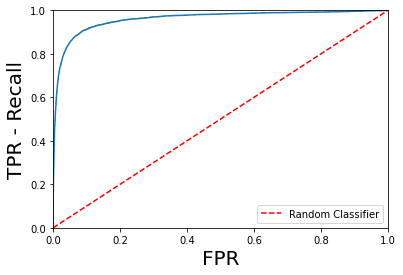

In [38]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"r--",label="Random Classifier")
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR - Recall", fontsize=20)
plt.axis([0,1,0,1])
plt.legend()

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [41]:
y_scores_forest = y_probas_forest[:, 1]

In [42]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

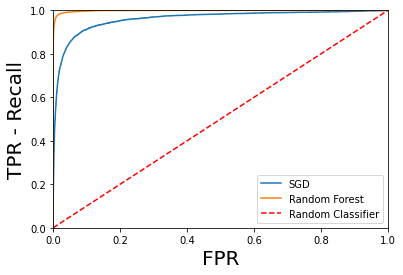

In [43]:
plt.plot(fpr,tpr, label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.plot([0,1],[0,1],"r--",label="Random Classifier")
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR - Recall", fontsize=20)
plt.axis([0,1,0,1])
plt.legend()

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [45]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5,
                                                                              y_scores_forest)

In [46]:
f1_best_forest = np.where(np.round(precisions_forest,2) == np.round(recalls_forest,2))[0][1]
f1_scores_forest = 2 * (precisions_forest * recalls_forest) / (precisions_forest + recalls_forest)
print(f1_best_forest, np.max(f1_scores_forest))

30 0.9511358368103847


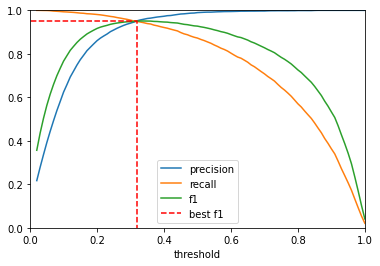

In [47]:
plt.plot(thresholds_forest, precisions_forest[:-1], label="precision")
plt.plot(thresholds_forest, recalls_forest[:-1], label="recall")
plt.plot(thresholds_forest, f1_scores_forest[:-1], label="f1")
plt.plot(np.r_[-10**10,np.repeat(thresholds_forest[f1_best_forest],2)],
         np.r_[np.repeat(precisions_forest[f1_best_forest],2), 0], "r--", label="best f1")
plt.axis([0,1,0,1])
plt.xlabel("threshold")
plt.legend()

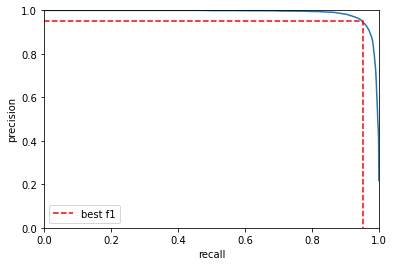

In [48]:
plt.plot(recalls_forest, precisions_forest)
plt.plot(np.r_[0,np.repeat(precisions_forest[f1_best_forest],2)],
         np.r_[np.repeat(precisions_forest[f1_best_forest],2), 0],
               "r--", label="best f1")
plt.axis([0,1,0,1])
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

In [49]:
threshold_forest=thresholds_forest[f1_best_forest]
y_predictions_best_forest = (y_scores_forest>threshold_forest)
unique_forest, counts_forest = np.unique(y_predictions_best_forest, return_counts=True)
print(np.asarray((unique_forest, counts_forest)).T)
print("Precision: ", precision_score(y_train_5, y_predictions_best_forest))
print("Recall: ", recall_score(y_train_5, y_predictions_best_forest))
print("F1: ", f1_score(y_train_5, y_predictions_best_forest))

[[    0 54636]
 [    1  5364]]
Precision:  0.9561894108873975
Recall:  0.9461353993728094
F1:  0.9511358368103847


In [50]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [51]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [52]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [53]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [54]:
len(ovr_clf.estimators_)

10

In [55]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [56]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [58]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

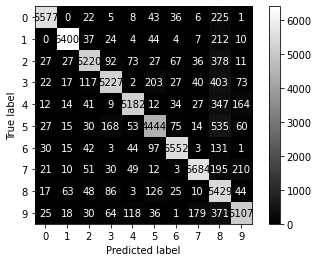

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(conf_mx)
disp.plot(cmap="gray")

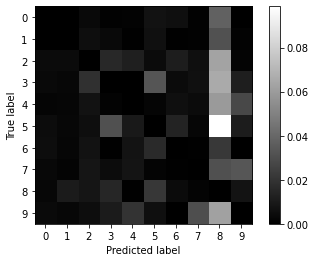

In [67]:
conf_mx_2 = conf_mx / conf_mx.sum(axis=1, keepdims=True)
np.fill_diagonal(conf_mx_2, 0)
disp_2 = ConfusionMatrixDisplay(conf_mx_2)
disp_2.plot(cmap="gray", include_values=False)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [74]:
print(y[0])
knn_clf.predict([some_digit])

5


array([[False,  True]])

In [84]:
y_train_knn_pred = knn_clf.predict(X_train)

In [85]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9868583757824326

In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(y_multilabel, y_train_knn_pred)

0.9856666666666667

In [92]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

(-0.5, 27.5, 27.5, -0.5)

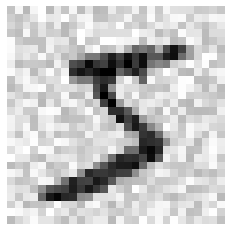

In [96]:
plt.imshow(X_train_mod[0].reshape(28,28), cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

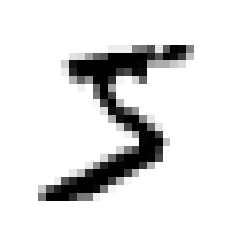

In [97]:
plt.imshow(y_train_mod[0].reshape(28,28), cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

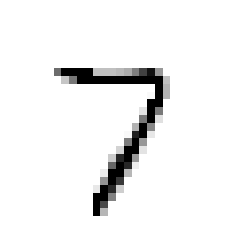

In [101]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plt.imshow(clean_digit.reshape(28,28), cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

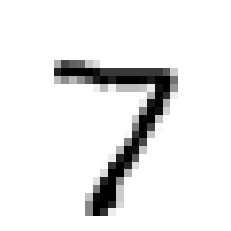

In [102]:
plt.imshow(y_test_mod[0].reshape(28,28), cmap="binary")
plt.axis("off")

In [117]:
from scipy.ndimage import shift

one = X_train[0]
one_shifted = shift(one.reshape(28,28),(0,3))

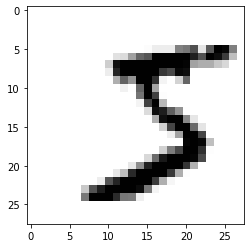

In [118]:
plt.imshow(one_shifted, cmap="binary")

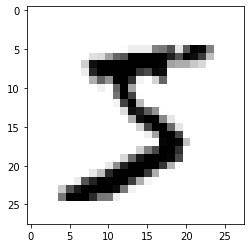

In [119]:
plt.imshow(one.reshape(28,28), cmap="binary")

(-0.5, 27.5, 27.5, -0.5)

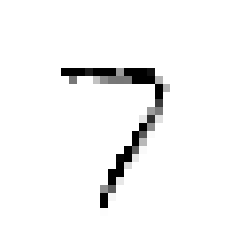

In [121]:
clean_digit = knn_clf.predict([X_test[0]])
plt.imshow(clean_digit.reshape(28,28), cmap="binary")
plt.axis("off")